### Imports

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, confusion_matrix

I hate warnings

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Fetch and prepare data

In [ ]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df['species_frac'], labels = pd.factorize(df['species'])
df = df.drop('species', axis=1)

df[features] = MinMaxScaler().fit_transform(df[features])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_frac
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


I'll need labels later

In [ ]:
labels_mapping = {i: val for i, val in enumerate(labels)}
labels_mapping

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

### K Mean clustering!

In [ ]:
X = df[features]
y = df['species_frac']

Beeg func to plot

In [ ]:
def plot_comparative_clusters(df, x_index: int, y_index: int,
                              labels_mapping: dict[int, str],
                              cluster_centers, x_name: str = None,
                              y_name: str = None):
  def __plot_cluster_centers():
    plt.scatter(cluster_centers[:, x_index], cluster_centers[:, y_index], label='centroid', color='red', marker='*', edgecolor='black', s=150)

  def __plot(target: str, title: str, num: int, is_cluster: bool = False):
    plt.subplot(1, 2, num)
    sns.scatterplot(data=df, x=x_feat, y=y_feat, hue=target)

    plt.xlabel(x_feat)
    plt.ylabel(y_feat)
    plt.title(title)

    if is_cluster:
      __plot_cluster_centers()
    plt.legend()

  get_feature_name = lambda index: df.columns[index]
  x_feat = get_feature_name(x_index)
  y_feat = get_feature_name(y_index)

  df = df.copy()
  df['species'] = df['species_frac'].map(labels_mapping)

  plt.figure(figsize=(12, 6))
  __plot('cluster', f'{len(cluster_centers)} clusters', 1, is_cluster=True)
  __plot('species', 'Actual species', 2)

Cluster and plot function

In [ ]:
def perform_clustering(df, n_clusters: int, x_index: int, y_index: int):
  model1 = KMeans(n_clusters=n_clusters)
  df['cluster'] = model1.fit_predict(X, y)
  cluster_centers = model1.cluster_centers_
  plot_comparative_clusters(df, x_index=x_index, y_index=y_index, labels_mapping=labels_mapping, cluster_centers=cluster_centers)

Clustering with 3 clusters

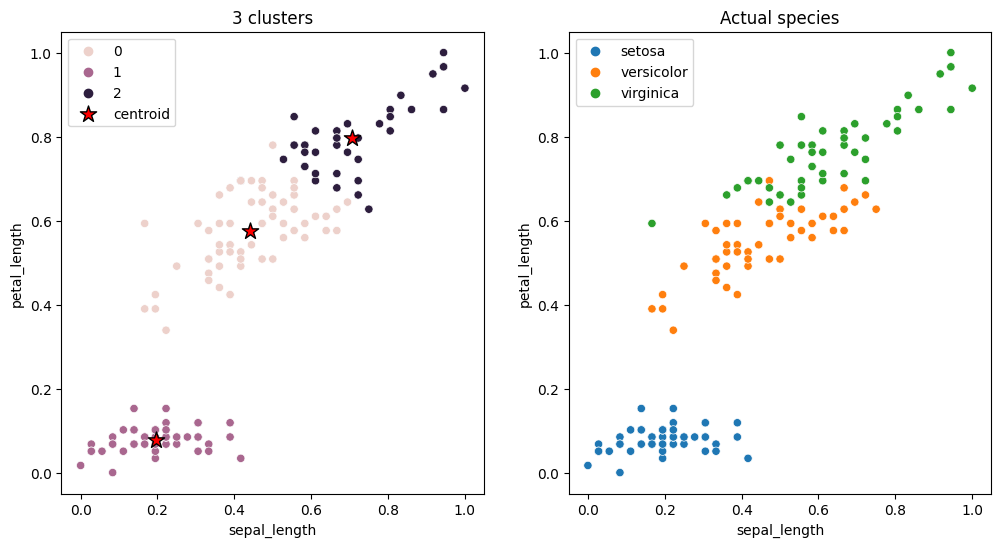

In [ ]:
perform_clustering(df, n_clusters=3, x_index=0, y_index=2)

Clustering with 4 clusters

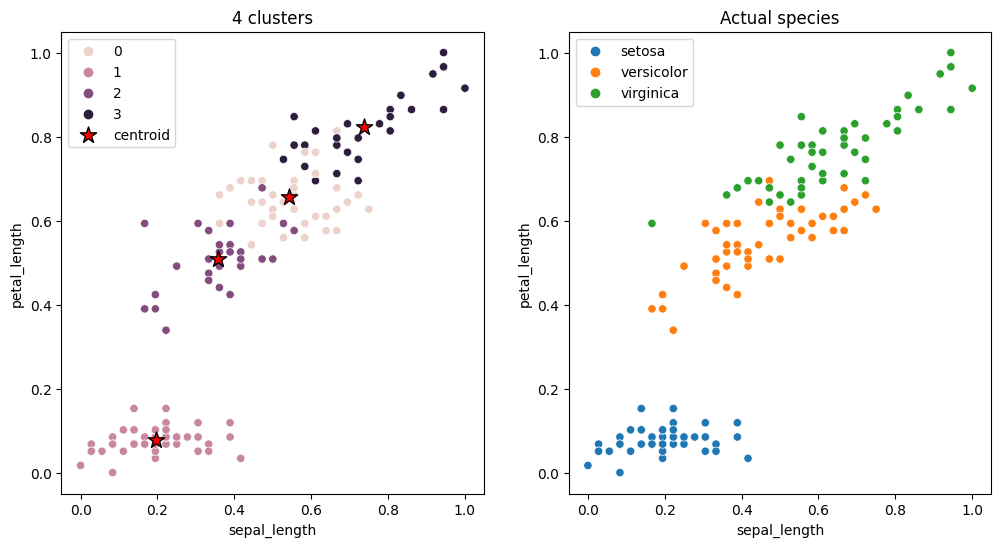

In [ ]:
perform_clustering(df, n_clusters=4, x_index=0, y_index=2)

Clustering with 2 clusters

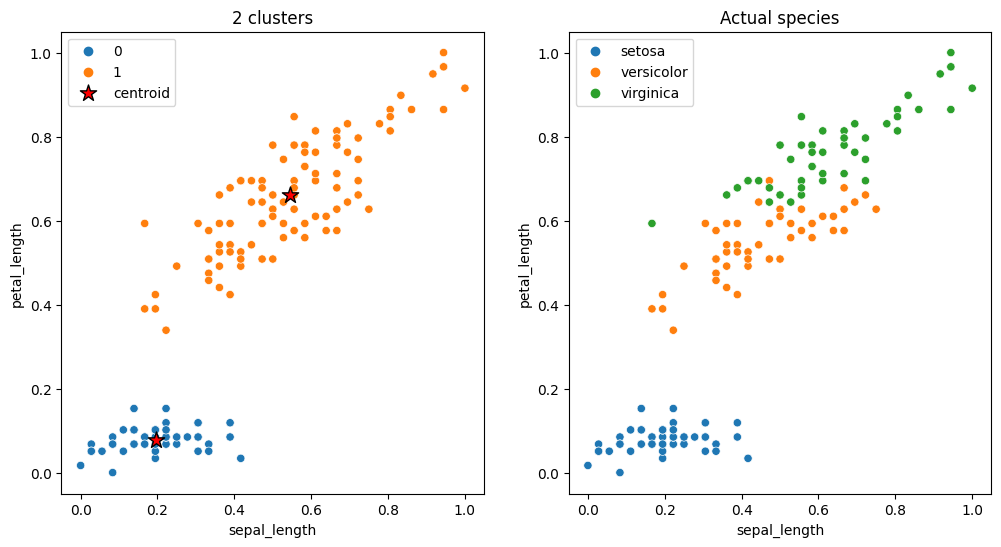

In [ ]:
perform_clustering(df, n_clusters=2, x_index=0, y_index=2)

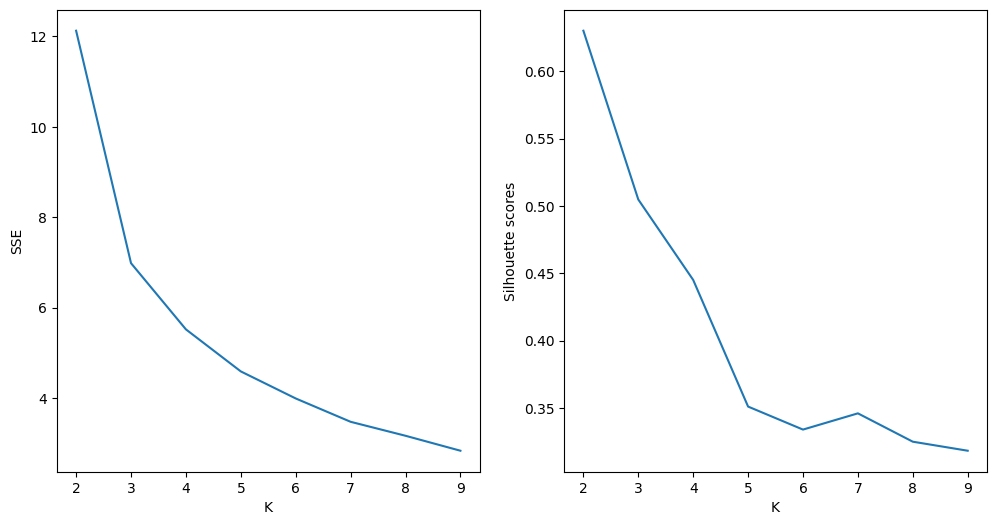

In [ ]:
sse = []
silhouette_scores = []

k_range = range(2, 10)
for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(X)
    sse.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X, model.labels_))


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range, sse)

plt.subplot(1, 2, 2)
plt.xlabel('K')
plt.ylabel('Silhouette scores')
plt.plot(k_range, silhouette_scores)

So yes, it looks like 3 is a compromise, but it is only indicatable with SSE. Because with Silhoette scores 2 looks like the best feat.